### <p style="font-size:32px;text-align:center"> <b>Link Prediction in a Social Graph </b> </p>

### Problem statement: 
Given a directed social graph, have to predict missing links to recommend users (Link Prediction in graph)

### Business objectives and constraints:  
- No low-latency requirement.
- Probability of prediction is useful to recommend highest probability links

<h3>References</h3>
<dl>
  <dt>&emsp;  The Link Prediction Problem for Social Networks</dt>
  <dd>&emsp;&emsp;  - Experimental setup & Provide important features</dd>
  <dt>&emsp; New Perspectives and Methods in Link Prediction</dt>
  <dd>&emsp;&emsp;  - Highlight problem associated with sparsity</dd>
  <dt>&emsp; Edge Prediction in a Social Graph</dt>
    <dt>&emsp;  Link Prediction using Supervised Learning</dt
    <dd>&emsp;&emsp;  -</dd>
    <dt>&emsp;</dt>
    <dd>&emsp;&emsp;</dd>
    <dt>&emsp;</dt>
    <dd>&emsp;&emsp;</dd>
    <dt>&emsp;</dt>
    <dd>&emsp;&emsp;</dd>
</dl>

In [1]:
#Importing Libraries
import warnings
warnings.filterwarnings("ignore") #never print matching warnings

import csv
import pandas as pd#pandas to create small dataframes 

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from matplotlib import rcParams#Size of plots  
import math
import pickle
import os
import networkx as nx
plt.close('all')

In [2]:
#reading graph
if not os.path.isfile('data/after_eda/train_woheader.csv'):
    traincsv = pd.read_csv('data/train.csv')
    print(traincsv[traincsv.isna().any(1)])
    print(traincsv.info())
    print("Number of duplicate entries: ",sum(traincsv.duplicated()))  #Return boolean Series denoting duplicate rows.
    traincsv.to_csv('data/after_eda/train_woheader.csv',header=False,index=False)
    print("saved the graph into file")


In [3]:
if os.path.isfile('data/after_eda/train_woheader.csv'):
    g = nx.read_edgelist('data/after_eda/train_woheader.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    print(nx.info(g))
    

Name: 
Type: DiGraph
Number of nodes: 1862220
Number of edges: 9437519
Average in degree:   5.0679
Average out degree:   5.0679


> Displaying a sub graph

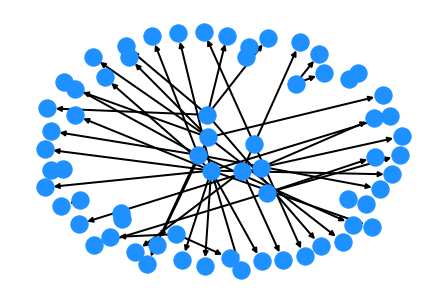

In [4]:
df = pd.read_csv('data/after_eda/train_woheader.csv', nrows=50, header=None)
df.columns = ['src','dest']
G = nx.from_pandas_edgelist(df, 'src', 'dest', create_using = nx.DiGraph())
pos = nx.spring_layout(G)
nx.draw(G,pos,node_color='#1E90FF',edge_color='#000000',width=2,edge_cmap=plt.cm.Blues,with_labels=False)
plt.savefig("graph_sample.pdf")

# 1. Exploratory Data Analysis

# No of unique persons 

In [25]:
print("The number of unique persons",len(g.nodes())) #Number of nodes
plt.close('all')

The number of unique persons 1862220


<h2>1.1 No of followers for each person</h2>

Text(0, 0.5, 'No of Followers')

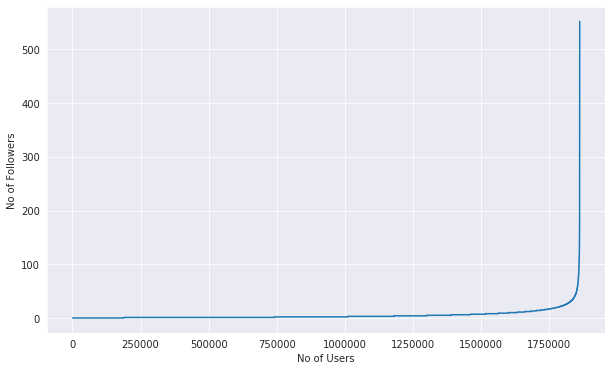

In [26]:
indegree_dist = list(dict(g.in_degree()).values())
indegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(indegree_dist)
plt.xlabel('No of Users')
plt.ylabel('No of Followers')


In [27]:
### 90-100 percentile
for i in range(0,101,10):
    print(i,'percentile value is',np.percentile(indegree_dist, i))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 1.0
30 percentile value is 1.0
40 percentile value is 2.0
50 percentile value is 2.0
60 percentile value is 3.0
70 percentile value is 5.0
80 percentile value is 7.0
90 percentile value is 12.0
100 percentile value is 552.0


<h3>50% of users have less than or equal to 2 followers</h3>

In [28]:
### 99-100 percentile
for i in np.linspace(99,100,11):
    print(i,'percentile value is',np.percentile(indegree_dist, i))

99.0 percentile value is 40.0
99.1 percentile value is 42.0
99.2 percentile value is 44.0
99.3 percentile value is 47.0
99.4 percentile value is 50.0
99.5 percentile value is 55.0
99.6 percentile value is 61.0
99.7 percentile value is 70.0
99.8 percentile value is 84.0
99.9 percentile value is 112.0
100.0 percentile value is 552.0


<h3>99% of user have less than 40 followers</h3>

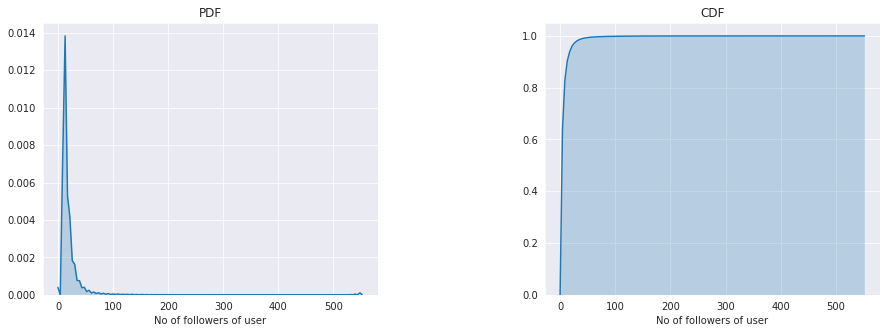

In [29]:
fig = plt.figure(figsize=[15,5]) #If a scalar, this defines the aspect ratio 
ax1 = plt.subplot(121) #(no.of rows, no.of columns), plot no. {1,2,3,4}
sns.kdeplot(indegree_dist, shade=True, ax=ax1)
plt.xlabel('No of followers of user')
plt.title("PDF")
print("\n\n")
ax2 = plt.subplot(122)
sns.kdeplot(indegree_dist, shade=True, cumulative=True,ax=ax2)
plt.xlabel('No of followers of user')
plt.title('CDF')
plt.subplots_adjust(wspace = 0.5) #adjust the space of subplots
plt.show()
plt.close()


<h2>1.2 No of people each person is following</h2>

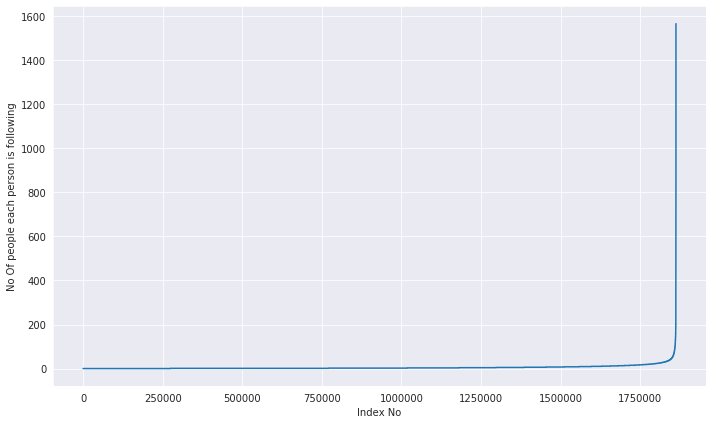

In [30]:
plt.close()
outdegree_dist = list(dict(g.out_degree()).values())
outdegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(outdegree_dist)
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following')
plt.tight_layout() #adjust the space of subplots
plt.show()

In [31]:
### 90-100 percentile
for i in range(0,101,10):
    print(i,'percentile value is',np.percentile(outdegree_dist, i))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 1.0
30 percentile value is 1.0
40 percentile value is 1.0
50 percentile value is 2.0
60 percentile value is 3.0
70 percentile value is 5.0
80 percentile value is 7.0
90 percentile value is 12.0
100 percentile value is 1566.0


<h3>50% of users have less than or equal to 2 followee</h3>

In [32]:
### 99-100 percentile
for i in np.linspace(99,100,11):
    print(i,'percentile value is',np.percentile(outdegree_dist, i))

99.0 percentile value is 40.0
99.1 percentile value is 42.0
99.2 percentile value is 45.0
99.3 percentile value is 48.0
99.4 percentile value is 52.0
99.5 percentile value is 56.0
99.6 percentile value is 63.0
99.7 percentile value is 73.0
99.8 percentile value is 90.0
99.9 percentile value is 123.0
100.0 percentile value is 1566.0


<h3>90% of users have less than or equal to 40 followee</h3>


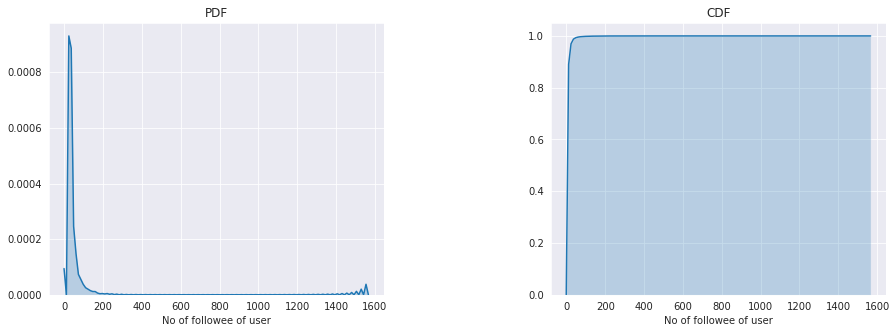

In [33]:
fig = plt.figure(figsize=[15,5]) #If a scalar, this defines the aspect ratio 
ax1 = plt.subplot(121) #(no.of rows, no.of columns), plot no. {1,2,3,4}
sns.kdeplot(outdegree_dist, shade=True, ax=ax1)
plt.xlabel('No of followee of user')
plt.title("PDF")
print("\n\n")
ax2 = plt.subplot(122)
sns.kdeplot(outdegree_dist, shade=True, cumulative=True,ax=ax2)
plt.xlabel('No of followee of user')
plt.title('CDF')
plt.subplots_adjust(wspace = 0.5) #adjust the space of subplots
plt.show()
plt.close()


<h3>Not Following</h3>

In [34]:
x = np.array(outdegree_dist)
not_following = sum(x == 0)
print('No of persons those are not following anyone are' ,not_following,'and is',
                               not_following*100/x.size,'% of total following')

No of persons those are not following anyone are 274512 and is 14.741115442858524 % of total following


<h3>Not Followed</h3>

In [29]:
x = np.array(indegree_dist)
not_followed = sum(x == 0)
print('No of persons having zero followers are' ,not_followed,'and is',
                                not_followed*100/x.size,'% of total followee')

No of persons having zero followers are 188043 and is 10.097786512871734 % of total followee


<h3>Not Followed and Not Following</h3>

In [30]:
print('No of persons those are not following anyone and also not having any followers are',len(list(nx.isolates(G))))

No of persons those are not following anyone and also not having any followers are 0


<h3>Followed and Following each other</h3>

In [17]:
def follows_back(a,b): #can be made more efficient if adjaceny matrix is used
    if g.has_edge(b,a):
        return 1
    else:
        return 0
    
lst = [follows_back(e[0],e[1]) for e in g.edges]

In [16]:
print('No of persons those are following and followed each other are',np.count_nonzero(lst)/2)


No of persons those are following and followed each other are 3268956.0


<h3>Number of connected components</h3>

In [22]:
ug = g.to_undirected() #simply sum up the indegree and outdegree


In [23]:
print(nx.number_connected_components(ug))

45558


<h2><i> We will predict 0 for nodes in different component</i></h2>

<h3> Nodes with degree(out_degree + in_degree) = 1</h3>

In [68]:
nodes_degree_1 = list()
nodes_degree_1 = [n for n in ug.nodes() if ug.degree(n) == 1] #list of all nodes with degree <= 1

In [69]:
x = len(nodes_degree_1)
print('No of nodes having degree == 1 is',len(lst),'and it is',(x/1862220)*100,'% of total nodes')

No of nodes having degree == 1 is 568885 and it is 30.548753638130833 % of total nodes


<h2><i> We will not consider these nodes for feature engineering and prediction</i></h2>

In [70]:
# g.remove_nodes_from(lst)
# print(nx.info(g))
#doesn't work as removing this makes degree 2 vertex degree 1
pickle.dump(nodes_degree_1,open('data/after_eda/nodes_degree_1.p','wb'))

<h3>Imbalanced datasets</h3>

In [76]:
per_one_label = (9437519*100)/(1862220*(1862219))
print(per_one_label,'%')
print("Degree of imbalance is EXTREME") 
#https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data

0.0002721423301374215 %
Degree of imbalance is EXTREME


<h3>1. We will downsample and upweight the Majority label class</h3>
<h4> Exploring More Options...</h4>

<ul>
<li><b>Assortativity Coefficient</b> - the
assortativity coefficient measures the correlation between the characteristics of
every pair of nodes that are connected. The assortativity coefficient is always about a specific property or variable of
the nodes in a network.  </li>
<li><b>Clustering Coefficient</b></li>
<li>Precision at k</li>
<li><b>ROC and AUC curves</b> - It has been used as a measure of performance in imbalanced learning.</li>
<li><b>Propflow method - </b></li>
<li><b>n-degree neighborhood of a node v<sub>i</sub></b> - the set of nodes exactly n hops aways from v<sub>i</sub></li>
<li><b>Mean Average Precision - </b></li>
<li><b>Clique- </b>a clique is a subset of vertices of an undirected graph such that every two distinct vertices in the clique are adjacent; that is, its induced subgraph is complete</li>
</ul>

<h3>Similarity Metrics</h3>
<ul>
    <li>Common Neighbors</li>
    <li>Jaccard Coefficient</li>
    <li>Adar Index</li>
    <li>Preferntial Attachment</li>
    <li>Katz</li>
    <li>Cosine Similarity</li>
    <li>Recommending users who follow you (but you don’t follow in return)</li>
    <li>Propflow Method</li>
    <li>PageRank</li>
    <li>Sum of log(Secondary Neighbors count)</li>
    <li>Sum of Neighbors</li><li></li>
    <li>Shortest Distance</li>
    <li> Second shortest distance</li>
    <li>Clustering Index:- </li><li></li><li></li><li></li><li></li><li></li><li></li>
    We normalize the feature values to have zero mean
and one standard deviation before using them in the
classification model.
</ul>

<h3>Candidate Selection</h3><p>
In order to run a machine learning algorithm to recommend edges (which would take two nodes, a source and a candidate destination, and generate a score measuring the likelihood that the source would follow the destination), it’s necessary to prune the set of candidates to run the algorithm on.</p>